In [1]:
from astropy.coordinates import SkyCoord
from astropy import units as u
import importlib
import matplotlib.pyplot as plt
import polars as pl
import sys
sys.path.append("../../")

from astroLuSt.database_interface import tesscut_interface as aldate
from astroLuSt.styles import plot_styles as alstps

importlib.reload(aldate)
importlib.reload(alstps)

#style for plotting
_ = alstps.tre_light()


In [2]:
#define targets
transients = [
    dict(coords=SkyCoord(327.16008333,-43.38001944, unit=u.deg), name="2018evo", sectors=[1],  period=1e8),
    # dict(coords=SkyCoord(315.03341667,-40.35859444, unit=u.deg), name="2018exc", sectors=[1],  period=1e8),
    # dict(coords=SkyCoord(313.47458333,-38.01559444, unit=u.deg), name="2018fgb", sectors=[1],  period=1e8),
    dict(coords=SkyCoord(342.82569167,-38.87439722, unit=u.deg), name="2018exg", sectors=[1],  period=1e8),
    dict(coords=SkyCoord(332.648,     -27.25016111, unit=u.deg), name="2018emt", sectors=[1],  period=1e8),
    dict(coords=SkyCoord(7258.67275,  66.856131,    unit=u.deg), name="2023ael", sectors=None, period=1e8), #extract all available sectors
]
rrlyr = [
    dict(coords=SkyCoord("19 25 27.9129605304 +42 47 03.693258204", frame="icrs", unit=(u.hourangle, u.deg)), name="RRLyr", sectors=[14,40],   period=0.5667732268824381),
    dict(coords=SkyCoord("14 16 36.5814789480 +42 21 35.712985824", frame="icrs", unit=(u.hourangle, u.deg)), name="TVBoo", sectors=[1,16,23], period=0.3125589785657776),
]

df_targets = pl.from_dicts(transients+rrlyr)
display(df_targets)


coords,name,sectors,period
object,str,list[i64],f64
"<SkyCoord (ICRS): (ra, dec) in deg (327.16008333, -43.38001944)>","""2018evo""",[1],1e8
"<SkyCoord (ICRS): (ra, dec) in deg (342.82569167, -38.87439722)>","""2018exg""",[1],1e8
"<SkyCoord (ICRS): (ra, dec) in deg (332.648, -27.25016111)>","""2018emt""",[1],1e8
"<SkyCoord (ICRS): (ra, dec) in deg (58.67275, 66.856131)>","""2023ael""",null,1e8
"<SkyCoord (ICRS): (ra, dec) in deg (291.366304, 42.78435924)>","""RRLyr""","[14, 40]",0.566773
"<SkyCoord (ICRS): (ra, dec) in deg (214.15242283, 42.35992027)>","""TVBoo""","[1, 16, 23]",0.312559


In [3]:
importlib.reload(aldate)

#instantiate
TCI = aldate.TESScut_Interface(
    n_jobs=5,
    redownload=True,
    sleep=.5,
    verbose=2,
)

#download
hdulists = TCI.download(
    coordinates=df_targets["coords"],
    sectors=df_targets["sectors"],
    targ_ids=df_targets["name"],
    combine_sectors=True,       #combine all downloaded sectors into one array
    ffi_header_keys=["TELESCOP"],
    prim_header_keys=["TELESCOP", "INSTRUME"],
    col_keys=["SECTOR","EXPOSURE"],
    n_jobs=None,
    savedir=f"../_data/",
    # savedir=None,             #don't save
    filenames=None,             #autogenerate
    verbose=None,
    parallel_kwargs=dict(backend="threading"),
    get_cutouts_kwargs=dict(size=[15,20], product="SPOC"),
)


INFO(TESScut_Interface.extract_target()): Working on `327.16008333 -43.38001944` (target_id='2018evo', 1/6)
INFO(TESScut_Interface.extract_target()): Working on `342.82569167 -38.87439722` (target_id='2018exg', 2/6)
INFO(TESScut_Interface.extract_target()): Working on `332.648 -27.25016111` (target_id='2018emt', 3/6)
INFO(TESScut_Interface.extract_target()): Working on `58.67274999999972 66.856131` (target_id='2023ael', 4/6)
INFO(TESScut_Interface.extract_target()): Working on `291.36630400221 42.784359238389996` (target_id='RRLyr', 5/6)
    INFO(TESScut_Interface.extract_target()): Extracting `sector=np.int64(1)` for `327.16008333 -43.38001944` (target_id='2018evo')
        INFO(TESScut_Interface.extract_target()): Try 1/3
    INFO(TESScut_Interface.extract_target()): Extracting `sector=np.int64(1)` for `332.648 -27.25016111` (target_id='2018emt')
        INFO(TESScut_Interface.extract_target()): Try 1/3
    INFO(TESScut_Interface.extract_target()): Extracting `sector=np.int64(1)` for

        INFO(TESScut_Interface.extract_target()): Try 2/3
        INFO(TESScut_Interface.extract_target()): Try 3/3
    WARNING(TESScut_Interface.extract_target()): WARNING: `sector=np.int64(1)` not found for `214.15242282895 42.359920273840004` (target_id='TVBoo')
    INFO(TESScut_Interface.extract_target()): Extracting `sector=np.int64(16)` for `214.15242282895 42.359920273840004` (target_id='TVBoo')
        INFO(TESScut_Interface.extract_target()): Try 1/3
    INFO(TESScut_Interface.extract_target()): Extracting `sector=np.int64(59)` for `58.67274999999972 66.856131` (target_id='2023ael')
        INFO(TESScut_Interface.extract_target()): Try 1/3
    INFO(TESScut_Interface._merge_sectors): Merging sectors...
    INFO(TESScut_Interface._merge_sectors): Merging sectors...
    INFO(TESScut_Interface.extract_target()): Extracting `sector=np.int64(40)` for `291.36630400221 42.784359238389996` (target_id='RRLyr')
        INFO(TESScut_Interface.extract_target()): Try 1/3
    INFO(TESScut_In

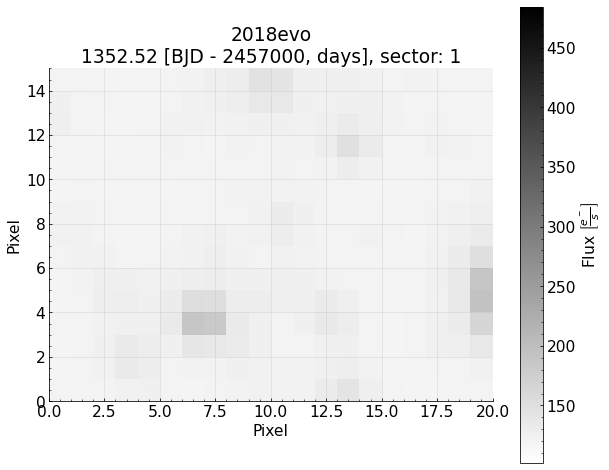

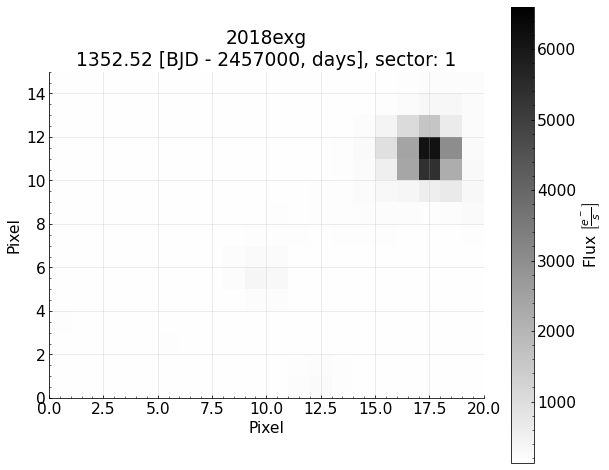

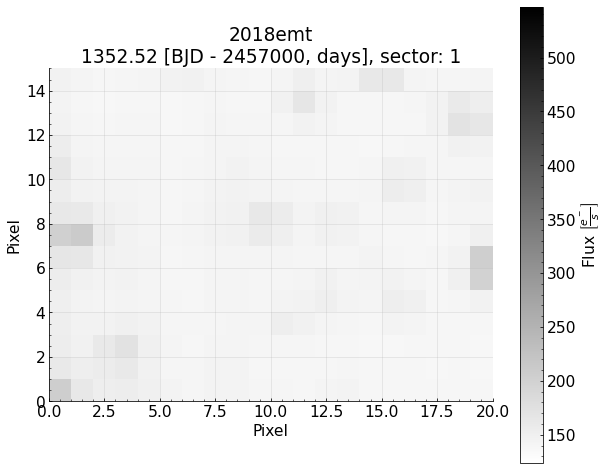

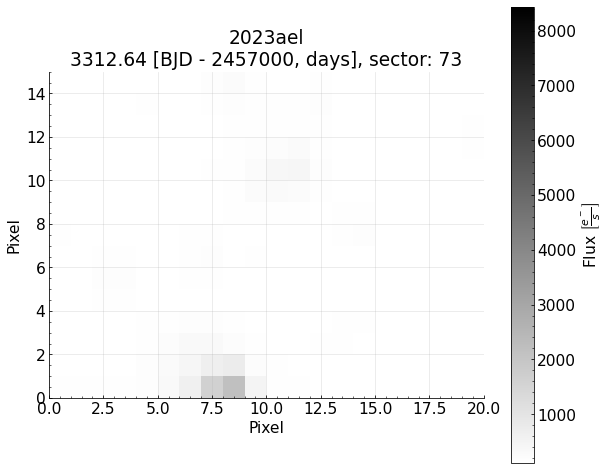

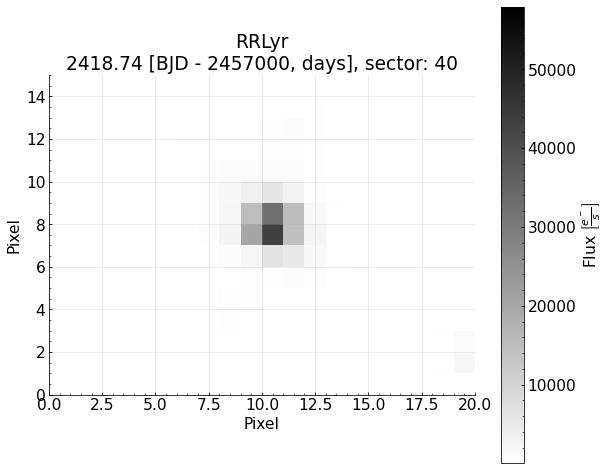

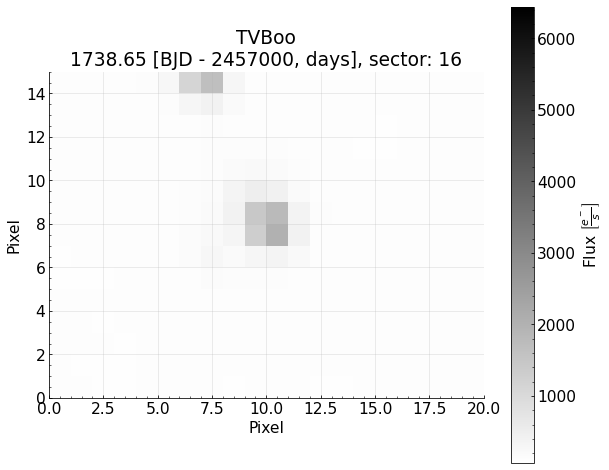

In [4]:
importlib.reload(aldate)

#plot
for idx, hdul in enumerate(hdulists[0:]):
    fig = plt.figure(figsize=(9,7), dpi=70)
    fig, axs, anim = TCI.plot_result(
        hdulist=hdul,
        fig=fig,
        animate=True,
        pcolormesh_kwargs=None,
        sctr_kwargs=None,
        func_animation_kwargs=dict(repeat=False, frames=range(0,len(hdul[1].data)-1,50))
    )
    fig.tight_layout()
    anim.save(
        f'../_gfx/tesscutinterface_{df_targets["name"][idx]}.gif',
        writer='pillow',
        # savefig_kwargs=dict(dpi=70)
    )
    # plt.close()
